In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbs

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explore Continous Features

In [3]:
features_to_drop =['PassengerId', 'Name','Ticket']
titanic.drop(features_to_drop, axis = 1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here Age's count is 714, thus there are some missing values in Age column.
Mean shows that only 38% people survived.
Pclass, SibSp,Parch are Ordinal variables.

In [5]:
# Understanding which features are strong indicators
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


Fare and Pclass standout and are strong indicators

In [6]:
#Understanding the missing value for Age column
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


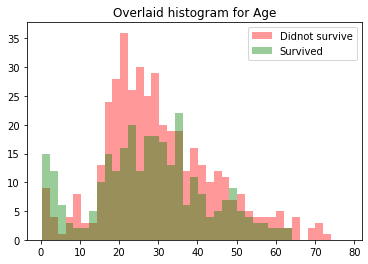

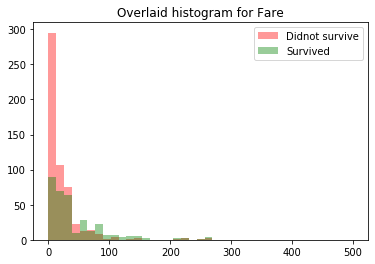

In [7]:
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax-xmin)/40
    sbs.distplot(died, color='r', kde=False, bins = np.arange(xmin, xmax, width))
    sbs.distplot(survived, color='g', kde=False, bins = np.arange(xmin, xmax, width))
    plt.legend(['Didnot survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 432x288 with 0 Axes>

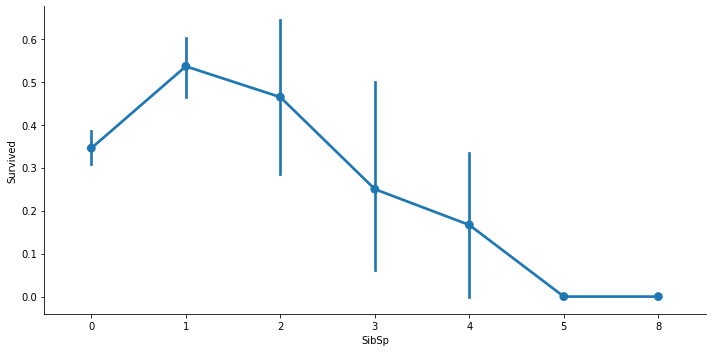

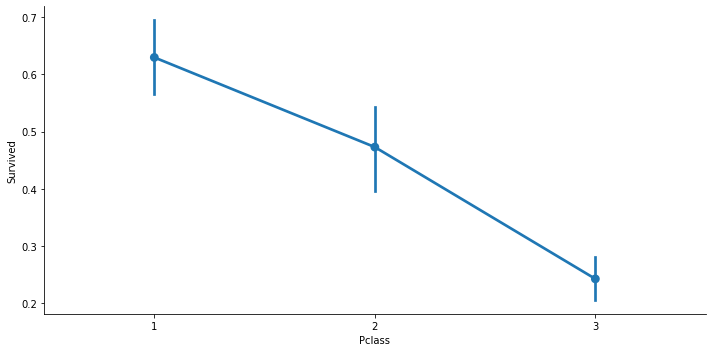

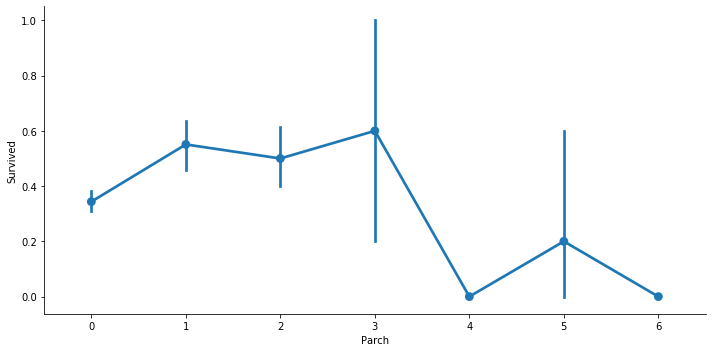

In [8]:
for i, col in enumerate (['SibSp', 'Pclass', 'Parch']):
    plt.figure(i)
    sbs.catplot(x= col, y='Survived', data=titanic, kind='point', aspect=2)

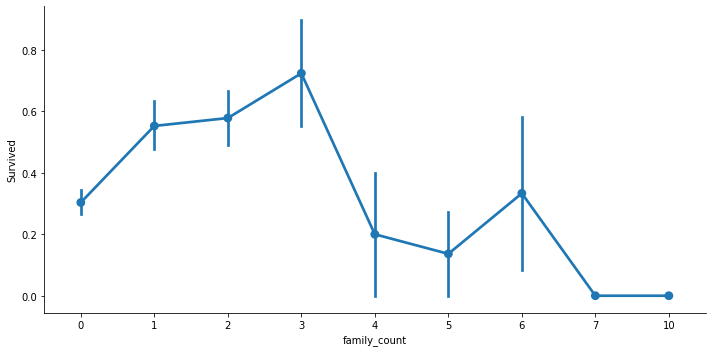

In [9]:
titanic['family_count']= titanic['Parch'] + titanic['SibSp']
sbs.catplot(x='family_count', y='Survived', data=titanic, kind='point', aspect=2)

In [10]:
# Filling the missing values in Age column 
titanic['Age'].fillna(titanic['Age'].mean(), inplace= True)
titanic['Age'].isnull().sum()

0

In [11]:
titanic.drop(['Parch', 'SibSp'], axis = 1,inplace = True)

Exploring Categorical Features

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             891 non-null float64
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
family_count    891 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [13]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived,Pclass,Age,Fare,family_count
Cabin,,,,,
False,0.666667,1.196078,35.258349,76.141504,0.877451
True,0.299854,2.639010,28.048341,19.157325,0.912664


In [14]:
titanic['Cabin_ind']=np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_count,Cabin_ind
0,0,3,male,22.0,7.2500,NaN,S,1,0
1,1,1,female,38.0,71.2833,C85,C,1,1
2,1,3,female,26.0,7.9250,NaN,S,0,0
3,1,1,female,35.0,53.1000,C123,S,1,1
4,0,3,male,35.0,8.0500,NaN,S,0,0


<Figure size 432x288 with 0 Axes>

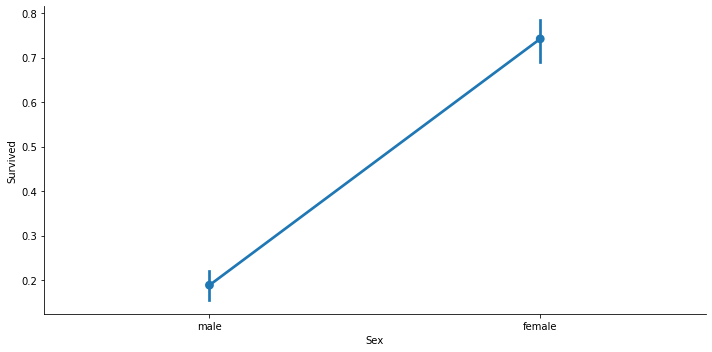

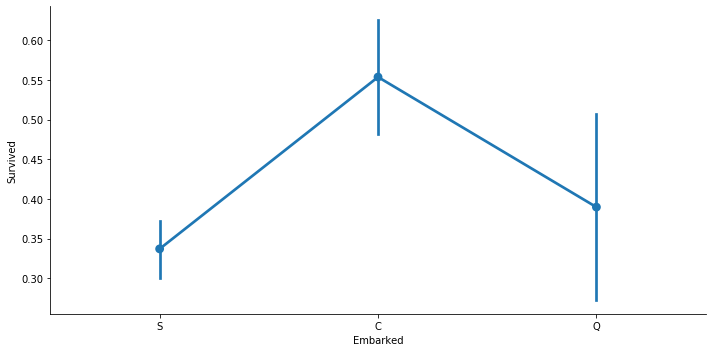

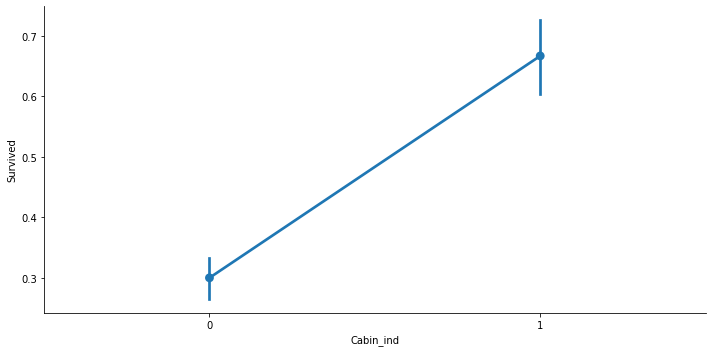

In [15]:
for i, col in enumerate (['Sex', 'Embarked', 'Cabin_ind']):
    plt.figure(i)
    sbs.catplot(x= col, y='Survived', data=titanic, kind='point', aspect=2)

Categorical Feature Cleaning

In [16]:
# Mapping Male and Female in Sex column
gender_num = {'male': 0, 'female': 1}
titanic['Sex_mapped'] = titanic['Sex'].map(gender_num)

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,family_count,Cabin_ind,Sex_mapped
0,0,3,male,22.0,7.2500,NaN,S,1,0,0
1,1,1,female,38.0,71.2833,C85,C,1,1,1
2,1,3,female,26.0,7.9250,NaN,S,0,0,1
3,1,1,female,35.0,53.1000,C123,S,1,1,1
4,0,3,male,35.0,8.0500,NaN,S,0,0,0


In [18]:
titanic.drop(['Sex', 'Embarked', 'Cabin'], axis=1, inplace=True)

In [19]:
titanic.head()

,Survived,Pclass,Age,Fare,family_count,Cabin_ind,Sex_mapped
0,0,3,22.0,7.2500,1,0,0
1,1,1,38.0,71.2833,1,1,1
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,1,1,1
4,0,3,35.0,8.0500,0,0,0


In [20]:
titanic.to_csv('titanic_cleaned.csv', index=False)

Splitting data in Test, Validation and Train Test

In [22]:
from sklearn.model_selection import train_test_split
titanic = pd.read_csv('titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Age,Fare,family_count,Cabin_ind,Sex_mapped
0,0,3,22.0,7.2500,1,0,0
1,1,1,38.0,71.2833,1,1,1
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,1,1,1
4,0,3,35.0,8.0500,0,0,0


In [25]:
features = titanic.drop('Survived', axis=1)
target = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 42)

In [28]:
X_train.to_csv('train_features.csv', index = False)
X_val.to_csv('val_features.csv', index = False)
X_test.to_csv('test_features.csv', index = False)

y_train.to_csv('train_target.csv', index = False)
y_val.to_csv('val_target.csv', index = False)
y_test.to_csv('test_target.csv', index = False)

C:\Users\kavit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """
C:\Users\kavit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\kavit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


# Logistic Regression

In [22]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

lr_features = pd.read_csv('train_features.csv')
lt_target = pd.read_csv('train_target.csv', header=None)

In [23]:
def print_results(results):
    print('Best Params : {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    params = results.cv_results_['params']
    
    for means, params in zip( means, params):
        print('{} for {}'.format(means, params))

In [24]:
lr = LogisticRegression()
# setting hyperparameters
parameters = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# using 5 fold cross validation
cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(lr_features, lt_target.values.ravel())

print_results(cv)

Best Params : {'C': 1}

0.6779026217228464 for {'C': 0.001}
0.704119850187266 for {'C': 0.01}
0.795880149812734 for {'C': 0.1}
0.797752808988764 for {'C': 1}
0.7940074906367042 for {'C': 10}
0.7940074906367042 for {'C': 100}
0.7940074906367042 for {'C': 1000}


In [25]:
cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

# SVM

In [53]:
from sklearn.svm import SVC

svm_features = pd.read_csv('train_features.csv')
svm_target = pd.read_csv('train_target.csv', header=None)

In [ ]:
svc = SVC()
svc_parameters = {
    'kernel' : ['linear'],
    'C' : [0.1, 1, 10]
}
svm_cv = GridSearchCV(svc,svc_parameters, cv=5)
svm_cv.fit(svm_features, svm_target.values.ravel())

print_results(svm_cv)


# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

rf_features = pd.read_csv('train_features.csv')
rf_target = pd.read_csv('train_target.csv', header=None)

In [28]:
rf = RandomForestClassifier()
rf_params = {
    'max_depth' : [2, 4, 8 , 16, None],
    'n_estimators' : [5, 50, 250]
}

rf_cv = GridSearchCV(rf, rf_params, cv=5)
rf_cv.fit(rf_features, rf_target.values.ravel())

print_results(rf_cv)

Best Params : {'max_depth': 8, 'n_estimators': 50}

0.7677902621722846 for {'max_depth': 2, 'n_estimators': 5}
0.797752808988764 for {'max_depth': 2, 'n_estimators': 50}
0.799625468164794 for {'max_depth': 2, 'n_estimators': 250}
0.799625468164794 for {'max_depth': 4, 'n_estimators': 5}
0.8239700374531835 for {'max_depth': 4, 'n_estimators': 50}
0.8220973782771536 for {'max_depth': 4, 'n_estimators': 250}
0.8220973782771536 for {'max_depth': 8, 'n_estimators': 5}
0.8258426966292135 for {'max_depth': 8, 'n_estimators': 50}
0.8164794007490637 for {'max_depth': 8, 'n_estimators': 250}
0.7883895131086143 for {'max_depth': 16, 'n_estimators': 5}
0.8071161048689138 for {'max_depth': 16, 'n_estimators': 50}
0.8127340823970037 for {'max_depth': 16, 'n_estimators': 250}
0.8089887640449438 for {'max_depth': None, 'n_estimators': 5}
0.8127340823970037 for {'max_depth': None, 'n_estimators': 50}
0.8071161048689138 for {'max_depth': None, 'n_estimators': 250}


In [29]:
import joblib
print(rf_cv.best_estimator_)
joblib.dump(rf_cv.best_estimator_ , 'RF_model.pkl')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


['RF_model.pkl']

# Gradient Boosting Classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gr_target = pd.read_csv('train_features.csv')
gr_features = pd.read_csv('train_target.csv', header=None)

gr = GradientBoostingClassifier()
gr_params ={
    'max_depth' : [1,3,5,7, None],
    'n_estimators' : [5, 50, 250, 500],
    'learning_rate' : [0.01, 0.1, 1, 10, 100]
}

In [19]:
gr_cv = GridSearchCV(gr, gr_params, cv=5)
gr_cv.fit(gr_target, gr_features.values.ravel())

print_results(gr_cv)
print(gr)

C:\Users\kavit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Params : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.6235955056179775 for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.795880149812734 for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.795880149812734 for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.8108614232209738 for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.6235955056179775 for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.8108614232209738 for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.8295880149812734 for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.8408239700374532 for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.6235955056179775 for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.8183520599250936 for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.8183520599250936 for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.829588014

In [20]:
joblib.dump(gr_cv.best_estimator_ , 'GR_model.pkl')

['GR_model.pkl']

# Final Model Selection and Evaluation

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv("val_features.csv")
val_target = pd.read_csv("val_target.csv", header = None)

test_features = pd.read_csv("test_features.csv")
test_target = pd.read_csv("test_target.csv", header = None)

In [45]:
models ={}
for md in ['LR', 'Rf', 'GR']:
    models[md] = joblib.load("{}_model.pkl".format(md))

In [36]:
def evaluate_models(name, model, features, label):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(label, pred), 3)
    precision = round(precision_score(label, pred), 3)
    recall = round(recall_score(label, pred), 3)
    print("{} : Accuracy Score {}, Precision {}, Recall {}, Latency {}\n".format(name, accuracy, precision, recall, round((end-start), 3)))

In [46]:
for name, mdl in models.items():
    evaluate_models(name, mdl, val_features, val_target)
    

LR : Accuracy Score 0.77, Precision 0.707, Recall 0.631, Latency 0.0

Rf : Accuracy Score 0.803, Precision 0.788, Recall 0.631, Latency 0.0

GR : Accuracy Score 0.815, Precision 0.808, Recall 0.646, Latency 0.016



In [47]:
# Evaluate Best model on Test Set
evaluate_models("GR", models['GR'], test_features, test_target)

GR : Accuracy Score 0.816, Precision 0.852, Recall 0.684, Latency 0.003

